In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Classification

Ici plutôt que de prédire une fonction $f:\mathbb{R} \to \mathbb{R}$.
On va chercher à classer des entrées réelles en divers catégories (2 pour commencer).

Exemple: L'entrée est une image d'un chiffre, la sortie est le chiffre (0,1,...,9) on a 10 catégories.

Exemple: On a une photo contenant un champignon, la réponse est toxique/comestible.

## Régression logistique manuelle

On va prendre un exemple plus simple.

In [2]:
r, R = 5, 10
n = 40

thetas, Thetas = np.random.uniform(low=0., high=2 * np.pi, size=(2, n))
rs = np.random.normal(loc=r, scale=0.5, size=(n, ))
Rs = np.random.normal(loc=R, scale=0.5, size=(n, ))

vrais = rs * np.cos(thetas), rs * np.sin(thetas)
faux = Rs * np.cos(Thetas), Rs * np.sin(Thetas)

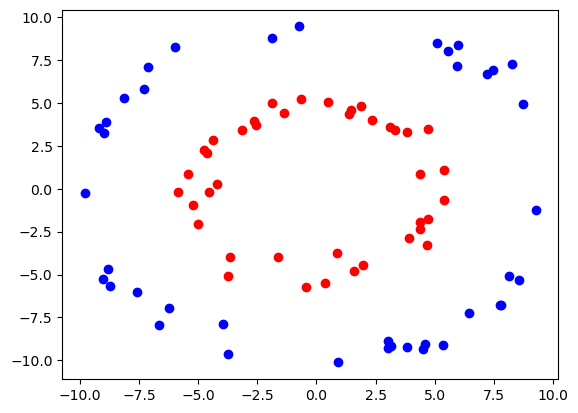

In [3]:
plt.scatter(*vrais, color="red")
plt.scatter(*faux, color="blue")


On a construit un modèle pour lequel une règle élémentaire de décision serait:

- rayon < 7.5 -> vrai
- rayon > 7.5 -> faux

**EXERCICE** Implémenter une régression logistique

L'idée est de voir un modèle avec trois paramètres réels $a,b,c$, tels que
$\sigma(a x^1 + b x^2 + c) \in [0,1]$ 
représente la probabilité d'être vrai.

Ici $\sigma$ est la sigmoide:
$$
\forall u \in \mathbb{R},\quad \sigma(u) = \frac{1}{1 + e^{-u}}.
$$


Ici les entrées sont des couples $((x^1_i,x^2_i))_{1\leq i \leq N}$ dans $\mathbb{R}^2$ et la sortie est $(y_i)_{1\leq i \leq N}$ suite de $0$ ou $1$.

In [4]:
X1 = np.stack(vrais).T
y1 = np.ones(shape=X1.shape[0])

In [5]:
X2 = np.stack(faux).T
y2 = np.zeros(shape=X2.shape[0])

In [6]:
X = np.concatenate((X1, X2))
X.shape

(80, 2)

In [7]:
y = np.concatenate((y1, y2))
y.shape

(80,)

On va chercher à minimiser la fonctionnelle:
    
$$
J(a, b, c)= -\sum_{i=1}^N {
y_i \ln(\sigma(a x^1_i + b x^2_i + c))
+ (1-y_i) \ln(1 -\sigma(a x^1_i + b x^2_i + c))
}
$$

**EXERCICE** implémenter cette minimisation.

In [8]:
def sigma(z):
    return 1. / (1. + np.exp(-z))

In [9]:
def a_minimiser(coeffs):
    a, b, c = coeffs
    ps = sigma(a * X[:, 0] + b * X[:, 1] + c)
    return - np.sum( y * np.log(ps) + (1. - y) * np.log(1 - ps))

In [10]:
resultat = minimize(
    fun=a_minimiser,
    x0=np.zeros(shape=(3,)),
)


a, b, c = resultat.x
ps = sigma(a * X[:, 0] + b * X[:, 1] + c)
preds = np.where(ps > 0.5, 1., 0.)
preds == y

array([ True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False,  True, False])

**EXERCICE** Assembler la matrice de confusion.

In [11]:
matrice = dict()

for vrai, prediction in zip(y, preds):
    matrice[(vrai, prediction)] = matrice.get((vrai, prediction), 0) + 1
    
matrice

{(1.0, 1.0): 24, (1.0, 0.0): 16, (0.0, 0.0): 22, (0.0, 1.0): 18}

**EXERCICE** 
Visualiser les zones de décisions.

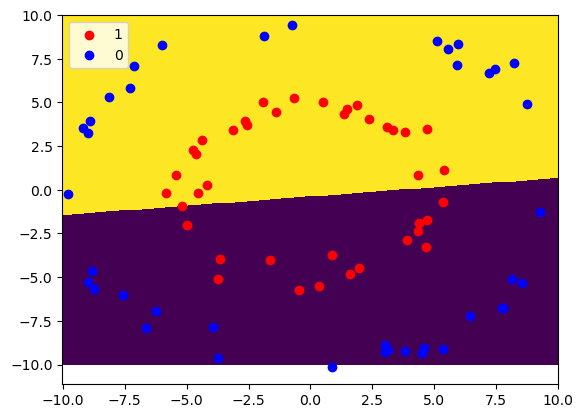

In [12]:
ud = np.linspace(-10., 10., 400)

xs, ys = np.meshgrid(ud, ud)

zs = np.where(sigma(a * xs + b * ys + c) > 0.5, 1., 0.)

fig, rep = plt.subplots()

rep.pcolor(xs, ys, zs, cmap="viridis")
rep.scatter(*vrais, color="red", label="1")
rep.scatter(*faux, color="blue", label="0")
rep.legend()

**EXERCICE** Comment faire en sorte de pouvoir mieux discriminer.

In [13]:
X1 = np.stack([*vrais, vrais[0]**2] + vrais[1]**2).T
y1 = np.ones(shape=X1.shape[0])
X1.shape, y1.shape

((40, 3), (40,))

In [14]:
X2 = np.stack([*faux, faux[0]**2] + faux[1]**2).T
y2 = np.zeros(shape=X2.shape[0])
X2.shape, y2.shape

((40, 3), (40,))

In [15]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))
X.shape, y.shape

((80, 3), (80,))

In [16]:
def a_minimiser(coeffs):
    a, b, c,d = coeffs
    ps = sigma(a * X[:, 0] + b * X[:, 1] + c * X[:,2] + d)
    return - np.sum( y * np.log(ps) + (1. - y) * np.log(1 - ps))

In [17]:
resultat = minimize(
    fun=a_minimiser,
    x0=np.zeros(shape=(4,)),
)


a, b, c, d = resultat.x
ps = sigma(a * X[:, 0] + b * X[:, 1] + c * X[:, 2] + d)
preds = np.where(ps > 0.5, 1., 0.)
preds == y

/tmp/ipykernel_7097/1560188450.py:4: RuntimeWarning: divide by zero encountered in log
  return - np.sum( y * np.log(ps) + (1. - y) * np.log(1 - ps))
/tmp/ipykernel_7097/1560188450.py:4: RuntimeWarning: invalid value encountered in multiply
  return - np.sum( y * np.log(ps) + (1. - y) * np.log(1 - ps))
/tmp/ipykernel_7097/3178285077.py:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))
/tmp/ipykernel_7097/1560188450.py:4: RuntimeWarning: divide by zero encountered in log
  return - np.sum( y * np.log(ps) + (1. - y) * np.log(1 - ps))
/tmp/ipykernel_7097/1560188450.py:4: RuntimeWarning: invalid value encountered in multiply
  return - np.sum( y * np.log(ps) + (1. - y) * np.log(1 - ps))
/tmp/ipykernel_7097/3178285077.py:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))
/tmp/ipykernel_7097/3178285077.py:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))
/tmp/ipykernel_7097/1560188450.py:4: RuntimeWarning: 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

/tmp/ipykernel_7097/3178285077.py:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


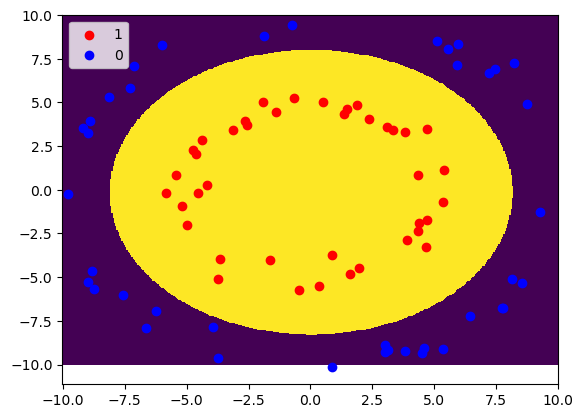

In [18]:
ud = np.linspace(-10., 10., 400)

xs, ys = np.meshgrid(ud, ud)

zs = np.where(sigma(a * xs + b * ys + c * (xs ** 2 + ys ** 2) + d) > 0.5, 1., 0.)

fig, rep = plt.subplots()

rep.pcolor(xs, ys, zs, cmap="viridis")
rep.scatter(*vrais, color="red", label="1")
rep.scatter(*faux, color="blue", label="0")
rep.legend()

**CONCLUSION** On voit qu'en rajoutant une variable explicative (une _feature_) un modèle linéaire permet de bien catégoriser le résultat.

Notons que pour éviter les overflows rencontrés ci-dessus on aurait pu pénaliser la fonction à minimiser en ajoutant la somme des coefficients au carré.